# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

Executing: /tmp/apt-key-gpghome.HZxMLnUY7z/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 http://securit

In [3]:
#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 87 not upgraded.
After this operation, 257 kB disk space will be freed.
(Reading database ... 159412 files and directories currently installed.)
Removing python3-cairo:amd64 (1.16.2-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 lib

Clone the repo with topsbm code.

In [5]:
!git clone https://github.com/martingerlach/hSBM_Topicmodel.git

fatal: destination path 'hSBM_Topicmodel' already exists and is not an empty directory.


In [6]:
%cd /content/hSBM_Topicmodel/

/content/hSBM_Topicmodel


In [7]:
!pwd

/content/hSBM_Topicmodel


# Preprocessing


In [8]:
import seaborn as sns 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
#import pgi
import nltk
import pymc3 
import pickle
import tqdm

In [9]:
pd.__version__
#pickle does not work in colab if the pandas version when we pickled the file was different from the one used when unpickling
#since colab doesn't have higher pandas available, make sure these are compatible

'1.3.5'

In [10]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

import graph_tool.all as gt
from sbmtm import sbmtm

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1500: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from 'gi' (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [11]:
import numpy as np 
import pandas as pd
from os import listdir
from os.path import isfile, join
import glob
import re 
import string
import urllib.parse
import nltk
#from topsbm import TopSBM
from sklearn.feature_extraction.text import CountVectorizer
#import tomotopy as tp
import pickle
import sklearn
import matplotlib.pyplot as plt

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from pprint import pprint
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Preprocessing bellow has already been done and the dataframe was pickled locally, if you are running for the first time, run these as well. 

In [12]:
#path = '/content/drive/MyDrive/bep/crawling_results'
#all_files = glob.glob(path + "/*.csv")

#li = []

#for file in all_files:
#    df = pd.read_csv(file, index_col=None, header=0)
#    li.append(df)

#frame = pd.concat(li, axis=0, ignore_index=True)

In [13]:
#frame = frame.drop(columns=["atee_enabled", 
#                            "cr_enabled", 
#                            "create_date", 
#                            "create_time", 
#                            "domainid", 
#                            "error", 
#                            "imageurl", 
#                            "maincontent_html", 
#                            "maincontentselector", 
#                            "pid" ,
#                            "pubdate", 
#                            "recommendation_span", 
#                            "success",
#                            "url",
#                            "userneed_enabled"])

In [14]:
#df = frame[frame["languagecode"] == "en"]
#df = df.dropna(subset=['maincontent']).reset_index()

In [15]:
#for i in range(len(df)):
#    df.loc[[i],['maincontent']] = urllib.parse.unquote(df.loc[i]['maincontent'])
#    df.loc[[i], ["title"]] = urllib.parse.unquote(df.loc[i]["title"])

In [16]:
#df['maincontent'] = df['maincontent'].map(lambda x: re.sub(r'[^\w\s]', '', x))
#df['maincontent'] = df['maincontent'].map(lambda x: re.sub(r'[0-9]+', '', x))

#remove the leftover punctuation and unwanted symbols
#df['maincontent'] = df['maincontent'].map(lambda x: x.lower())
#make all the text lowercase

In [17]:
#for i in range(len(df)):
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("monitor empower uganda we come to you\nwe are always looking for ways to improve our stories let us know what you liked and what we can improve on i've got feedback premium share", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("sharepremium content this page is available only to subscribers click here to sign in or obtain access", "")
#    df.loc[[i], ["maincontent"]] = re.sub("\S*@\S*\s?", "", df["maincontent"][i])
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("premium content this page is available only to subscribers click here to sign in or obtain access", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("<br><br>please enable javascript and reload page share this article", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("editorial@ugnationmediacom", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("monitor empower uganda we come to you\nwe are always looking for ways to improve our stories let us know what you liked and what we can improve on i've got feedback", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("follow @journalism_jobs on twitter related jobs art market editor maternity cover finance correspondent reporter digital audience and content editor facebook community reporter categories editors and management editors and management feed news news feed new media new media feed", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("click here", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("follow @journalism_jobs on twitter related jobs desk editor facebook community reporter facebook community reporter big tech reporter reporter categories editorial assistants  trainees editorial assistants  trainees feed features features feed news news feed new media new media feed social media social media feed", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("reporter journalist subeditor digital publishing assistant art market editor maternity cover finance correspondent reporter categories editors and management editors and management feed features features feed news news feed specialist writers specialist writers feed new media new media feed", "")
#    df.loc[[i], ["maincontent"]] = df["maincontent"][i].replace("subscribe to our email job alerts to get more jobs like this andor follow @journalism_jobs on twitter", "")


In [ ]:
#pickle.dump(df, open("save.p", "wb"))

If you ran the previous cells, skip the next one. Otherwise, get the save.p and continue from here.

In [18]:
df = pd.read_pickle(open("/content/save.p", "rb"))

In [19]:
nltk.download("stopwords")
from nltk.corpus import stopwords
#we are removing the common stopwords

stop_words = stopwords.words('english') + ["I", "'ve", "e'", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "sh"]
df['clean'] = df['maincontent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
df["tokens"] = [nltk.word_tokenize(df["clean"][i]) for i in range(len(df))]

In [21]:
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
#lemmas are the core forms of the words - infinitive, singular etc.

lemmatizer = WordNetLemmatizer()

df["lemmas"] = [[lemmatizer.lemmatize(i) for i in df["tokens"][k]] for k in range(len(df))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


#LDA baseline

In [91]:
#input for the model
id2word = corpora.Dictionary([df["lemmas"][i] for i in range(len(df))])
lda_texts = [df["lemmas"][i] for i in range(len(df))]
corpus = [id2word.doc2bow(text) for text in lda_texts]

In [92]:
# supporting function
def compute_coherence_values(corpus, id2word, k):
    
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
  lda_model.save("/content/lda{}".format(k))
  tops = lda_model.print_topics(num_topics=-1, num_words=10)
  pickle.dump(tops, open("lda_topics{}".format(k), "wb"))
  #we save all these to track the results
    
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda_texts, dictionary=id2word, coherence='c_v')
    
  return coherence_model_lda.get_coherence()

In [93]:

# Topics range
min_topics = 10
max_topics = 70
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
  pbar = tqdm.tqdm(total=540)

  # iterate through number of topics
  for k in topics_range:
    # get the coherence score for the given parameters
      cv = compute_coherence_values(corpus=corpus, id2word=id2word,  k=k)
      # Save the model results
      model_results['Topics'].append(k)
      model_results['Coherence'].append(cv)
                    
      pbar.update(1)
  pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
  pbar.close()

  2%|▏         | 12/540 [40:26<29:39:45, 202.24s/it]


In [94]:
model_results

{'Coherence': [0.5347452059707031,
  0.5213219955222924,
  0.5495392336666274,
  0.5295158608821104,
  0.5299858285098255,
  0.521261724491271,
  0.5152456162248683,
  0.5075559813674027,
  0.5242179168409608,
  0.5055245159125314,
  0.4907179703343814,
  0.5117166522893799],
 'Topics': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]}

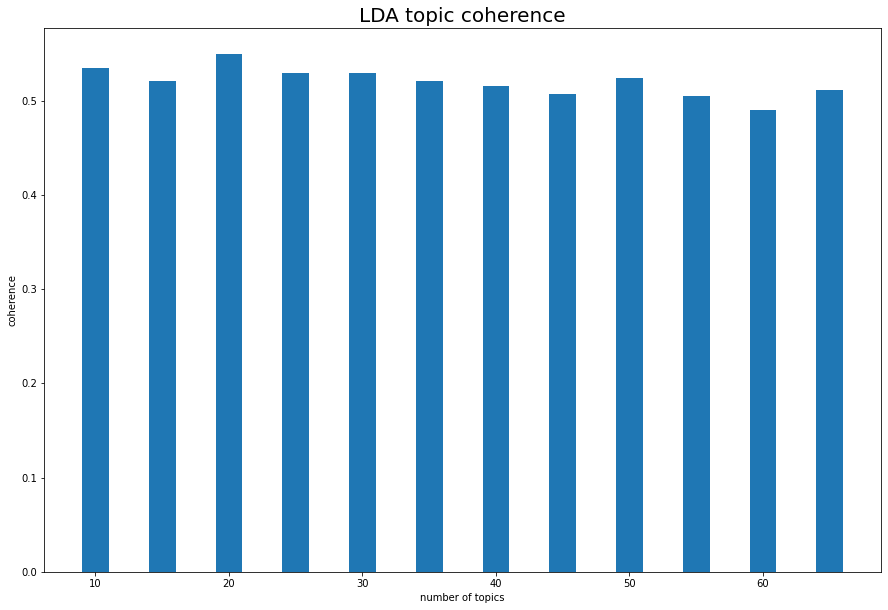

In [95]:
plt.figure(figsize=(15, 10))
plt.bar(model_results["Topics"], model_results["Coherence"], width=2)
plt.title("LDA topic coherence", size=20)
plt.xlabel("number of topics")
plt.ylabel("coherence");

In the next cell we can print the topics of some mode. We have to load it first.

In [ ]:
#pprint(lda_model.print_topics())

[(0,
  '0.050*"school" + 0.030*"university" + 0.027*"education" + 0.027*"student" + '
  '0.020*"teacher" + 0.012*"primary" + 0.009*"learning" + 0.009*"staff" + '
  '0.007*"learner" + 0.007*"pupil"'),
 (1,
  '0.023*"said" + 0.012*"president" + 0.011*"government" + 0.009*"state" + '
  '0.008*"police" + 0.008*"mr" + 0.007*"country" + 0.007*"member" + '
  '0.006*"minister" + 0.006*"national"'),
 (2,
  '0.029*"health" + 0.026*"africa" + 0.022*"african" + 0.021*"covid" + '
  '0.012*"country" + 0.010*"world" + 0.009*"vaccine" + 0.009*"pandemic" + '
  '0.008*"disease" + 0.008*"hospital"'),
 (3,
  '0.011*"love" + 0.008*"post" + 0.008*"day" + 0.007*"art" + 0.007*"new" + '
  '0.006*"music" + 0.005*"brand" + 0.005*"instagram" + 0.005*"view" + '
  '0.005*"book"'),
 (4,
  '0.034*"ukraine" + 0.027*"russia" + 0.020*"russian" + 0.017*"said" + '
  '0.012*"war" + 0.011*"putin" + 0.010*"country" + 0.010*"u" + '
  '0.009*"ukrainian" + 0.008*"afp"'),
 (5,
  '0.011*"government" + 0.010*"percent" + 0.010*"cou

# TopSBM

In [47]:
titles = [i for i in range(len(df))]
sbm_texts = [df["lemmas"][i] for i in range(len(df))]

In [48]:
topsbm = sbmtm()

In [49]:
topsbm.make_graph(sbm_texts, documents=titles)
#makes a bipartite graph where documents are on the left and words are on the right

In [50]:
topsbm.fit()

<NestedBlockState object, with base <BlockState object with 78520 blocks (652 nonempty), degree-corrected, for graph <Graph object, undirected, with 78520 vertices and 800512 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fc731f65190>, at 0x7fc731f65ad0>, and 6 levels of sizes [(78520, 652), (652, 104), (104, 20), (20, 4), (4, 2), (2, 1)] at 0x7fc7333018d0>


In [51]:
topsbm.save_model("/content/topsbm")

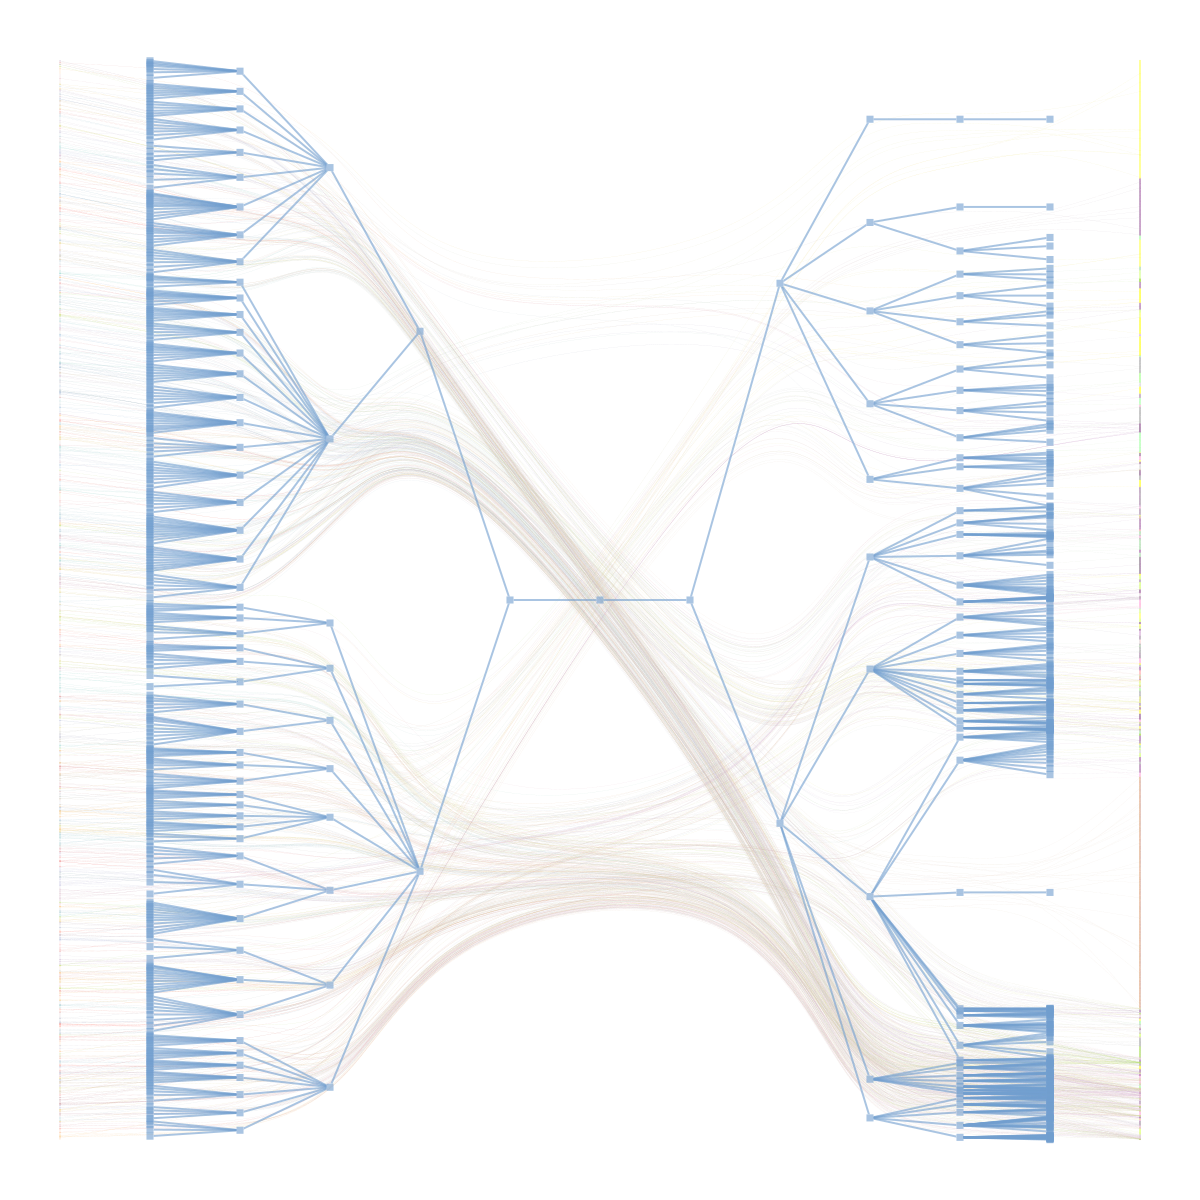

In [52]:
topsbm.plot()

In [61]:
topsbm_topics1 = topsbm.topics(l=1, n=10)
#there are multiple levels to the hierarchy - level 1 can show us all the topics
#the most appropriate number of topics seems to be 52

In [77]:
sbm_topics = []
for i in range(len(topsbm_topics1)):
  sbm_topics.append([])
  for j in range(len(topsbm_topics1[i])):
    sbm_topics[i].append(topsbm_topics1[i][j][0])

In [89]:
pickle.dump(sbm_topics, open("sbm_topics.p", "wb"))

In [79]:
topsbm_cv = CoherenceModel(topics=sbm_topics, texts=lda_texts, corpus=corpus, dictionary=id2word, coherence="c_v", topn=10).get_coherence()

In [90]:
sbm_topics
#topics are always lists of words

[['state',
  'war',
  'force',
  'military',
  'afp',
  'nation',
  'monday',
  'following',
  'statement',
  'attack'],
 ['need',
  'day',
  'story',
  'related',
  'like',
  'many',
  'get',
  'life',
  'want',
  'around'],
 ['know',
  'improve',
  'hour',
  'ago',
  'always',
  'monitor',
  'got',
  'looking',
  'let',
  'reading'],
 ['vaccine',
  'fire',
  'vaccination',
  'malaria',
  'vaccinated',
  'flag',
  'australia',
  'dos',
  'mandatory',
  'diamond'],
 ['year',
  'february',
  'month',
  'could',
  'including',
  'high',
  'report',
  'however',
  'among',
  'local'],
 ['torture',
  'sudan',
  'violence',
  'opposition',
  'congo',
  'protest',
  'democratic',
  'republic',
  'abuse',
  'rebel'],
 ['use',
  'job',
  'challenge',
  'opportunity',
  'working',
  'level',
  'ensure',
  'result',
  'position',
  'especially'],
 ['one',
  'time',
  'way',
  'first',
  'make',
  'take',
  'good',
  'even',
  'may',
  'back'],
 ['people',
  'say',
  'new',
  'work',
  'help',
  

In [81]:
p_td_d,p_tw_w = topsbm.group_membership(l=1)

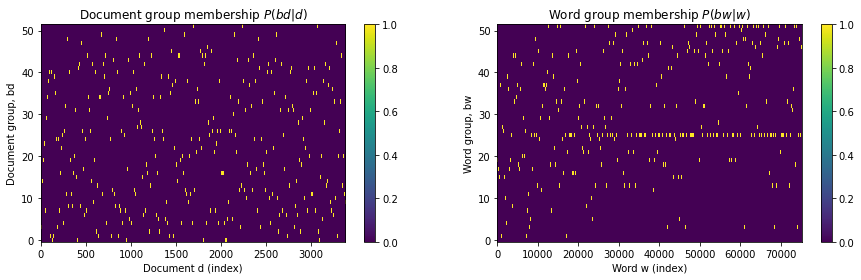

In [85]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()

Not really a comprehensive visualization but worth a try.

#ProdLDA

In [22]:
!pip install pyro-ppl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 718 kB 15.5 MB/s 


In [23]:
import os
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS
import torch

assert pyro.__version__.startswith('1.8.1')
# Enable smoke test - run the notebook cells on CI.
smoke_test = 'CI' in os.environ
import math
import torch.nn as nn
import torch.nn.functional as F
from pyro.infer import SVI, TraceMeanField_ELBO
from tqdm import trange
import torch
import pyro

In [ ]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, num_topics, hidden, dropout):
        super().__init__()
        self.drop = nn.Dropout(dropout)  # to avoid component collapse
        self.fc1 = nn.Linear(vocab_size, hidden)
        self.fc2 = nn.Linear(hidden, hidden)
        self.fcmu = nn.Linear(hidden, num_topics)
        self.fclv = nn.Linear(hidden, num_topics)
        # NB: here we set `affine=False` to reduce the number of learning parameters
        # See https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        # for the effect of this flag in BatchNorm1d
        self.bnmu = nn.BatchNorm1d(num_topics, affine=False)  # to avoid component collapse
        self.bnlv = nn.BatchNorm1d(num_topics, affine=False)  # to avoid component collapse

    def forward(self, inputs):
        h = F.softplus(self.fc1(inputs))
        h = F.softplus(self.fc2(h))
        h = self.drop(h)
        # μ and Σ are the outputs
        logtheta_loc = self.bnmu(self.fcmu(h))
        logtheta_logvar = self.bnlv(self.fclv(h))
        logtheta_scale = (0.5 * logtheta_logvar).exp()  # Enforces positivity
        return logtheta_loc, logtheta_scale

In [ ]:
class Decoder(nn.Module):
    # Base class for the decoder net, used in the model
    def __init__(self, vocab_size, num_topics, dropout):
        super().__init__()
        self.beta = nn.Linear(num_topics, vocab_size, bias=False)
        self.bn = nn.BatchNorm1d(vocab_size, affine=False)
        self.drop = nn.Dropout(dropout)

    def forward(self, inputs):
        inputs = self.drop(inputs)
        # the output is σ(βθ)
        return F.softmax(self.bn(self.beta(inputs)), dim=1)


class ProdLDA(nn.Module):
    def __init__(self, vocab_size, num_topics, hidden, dropout):
        super().__init__()
        self.vocab_size = vocab_size
        self.num_topics = num_topics
        self.encoder = Encoder(vocab_size, num_topics, hidden, dropout)
        self.decoder = Decoder(vocab_size, num_topics, dropout)

    def model(self, docs):
        pyro.module("decoder", self.decoder)
        with pyro.plate("documents", docs.shape[0]):
            # Dirichlet prior 𝑝(𝜃|𝛼) is replaced by a logistic-normal distribution
            logtheta_loc = docs.new_zeros((docs.shape[0], self.num_topics))
            logtheta_scale = docs.new_ones((docs.shape[0], self.num_topics))
            logtheta = pyro.sample(
                "logtheta", dist.Normal(logtheta_loc, logtheta_scale).to_event(1))
            theta = F.softmax(logtheta, -1)

            # conditional distribution of 𝑤𝑛 is defined as
            # 𝑤𝑛|𝛽,𝜃 ~ Categorical(𝜎(𝛽𝜃))
            count_param = self.decoder(theta)
            # Currently, PyTorch Multinomial requires `total_count` to be homogeneous.
            # Because the numbers of words across documents can vary,
            # we will use the maximum count accross documents here.
            # This does not affect the result because Multinomial.log_prob does
            # not require `total_count` to evaluate the log probability.
            total_count = int(docs.sum(-1).max())
            pyro.sample(
                'obs',
                dist.Multinomial(total_count, count_param),
                obs=docs
            )

    def guide(self, docs):
        pyro.module("encoder", self.encoder)
        with pyro.plate("documents", docs.shape[0]):
            # Dirichlet prior 𝑝(𝜃|𝛼) is replaced by a logistic-normal distribution,
            # where μ and Σ are the encoder network outputs
            logtheta_loc, logtheta_scale = self.encoder(docs)
            logtheta = pyro.sample(
                "logtheta", dist.Normal(logtheta_loc, logtheta_scale).to_event(1))

    def beta(self):
        # beta matrix elements are the weights of the FC layer on the decoder
        return self.decoder.beta.weight.cpu().detach().T

In [32]:
all_text = []
#make a set of all words
for i in range(len(df)):
    for word in df["lemmas"][i]:
        all_text.append(word)

vocab = set(all_text)

In [33]:
#once again so we dont get lost

id2word = corpora.Dictionary([df["lemmas"][i] for i in range(len(df))])
lda_texts = [df["lemmas"][i] for i in range(len(df))]
corpus = [id2word.doc2bow(text) for text in lda_texts]

In [34]:
full_vocab = pd.DataFrame(columns=["word", "index"])
full_vocab["word"] = list(vocab)
full_vocab["index"] = full_vocab.index

In [ ]:
prod_lemmas = [" ".join([word for word in df["lemmas"][i]]) for i in range(len(df))]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
prod_texts = torch.from_numpy(vec.fit_transform([prod_lemmas[i] for i in range(len(df))]).toarray())

In [ ]:
seed = 100
torch.manual_seed(seed)
pyro.set_rng_seed(seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

prod_texts = prod_texts.float().to(device)
batch_size = 32
learning_rate = 1e-3
num_epochs = 10 if not smoke_test else 1

We run the same experiment as before.

In [ ]:

# Topics range
min_topics = 10
max_topics = 70
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
  pbar = tqdm.tqdm(total=540)

  # iterate through number of topics
  for k in topics_range:
      # get the coherence score for the given parameters
      pyro.clear_param_store()

      prodLDA = ProdLDA(
                        vocab_size=prod_texts.shape[1],
                        num_topics=k,
                        hidden=100 if not smoke_test else 10,
                        dropout=0.2)
      
      prodLDA.to(device)

      optimizer = pyro.optim.Adam({"lr": learning_rate})
      svi = SVI(prodLDA.model, prodLDA.guide, optimizer, loss=TraceMeanField_ELBO())
      num_batches = int(math.ceil(prod_texts.shape[0] / batch_size)) if not smoke_test else 1

      bar = trange(num_epochs)
      for epoch in bar:
          running_loss = 0.0
          for i in range(num_batches):
              batch_docs = prod_texts[i * batch_size:(i + 1) * batch_size, :]
              loss = svi.step(batch_docs)
              running_loss += loss / batch_docs.size(0)

          bar.set_postfix(epoch_loss='{:.2e}'.format(running_loss))

      #we need to do a bit more work to get the topics into appropriate form for the gensim coherence 
      topics = []
      for i in range(k):
          sorted_, indices = torch.sort(prodLDA.beta()[i], descending=True)
          df = pd.DataFrame(indices[:10].numpy(), columns=['index'])
          words = pd.merge(df, full_vocab[['index', 'word']], how='left', on='index')['word'].values.tolist()
          topics.append(words)

      pd.DataFrame(topics).to_csv("prodlda_topics{}".format(k))
      
      cv = CoherenceModel(topics=topics,texts=lda_texts, corpus=corpus, dictionary=id2word, coherence="c_v", topn=10).get_coherence()

      # Save the model results
      model_results['Topics'].append(k)
      model_results['Coherence'].append(cv)
                    
      pbar.update(1)
  pd.DataFrame(model_results).to_csv('prodLDA_tuning_results.csv', index=False)
  pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 1/540 [10:02<90:08:13, 602.03s/it]


  0%|          | 0/10 [00:00<?, ?it/s, epoch_loss=2.74e+05]

 10%|█         | 1/10 [00:00<00:08,  1.11it/s, epoch_loss=2.74e+05]

 10%|█         | 1/10 [00:01<00:08,  1.11it/s, epoch_loss=2.69e+05]

 20%|██        | 2/10 [00:01<00:07,  1.12it/s, epoch_loss=2.69e+05]

 20%|██        | 2/10 [00:02<00:07,  1.12it/s, epoch_loss=2.63e+05]

 30%|███       | 3/10 [00:02<00:06,  1.12it/s, epoch_loss=2.63e+05]

 30%|███       | 3/10 [00:03<00:06,  1.12it/s, epoch_loss=2.59e+05]

 40%|████      | 4/10 [00:03<00:05,  1.13it/s, epoch_loss=2.59e+05]

 40%|████      | 4/10 [00:04<00:05,  1.13it/s, epoch_loss=2.55e+05]

 50%|█████     | 5/10 [00:04<00:04,  1.13it/s, epoch_loss=2.55e+05]

 50%|█████     | 5/10 [00:05<00:04,  1.13it/s, epoch_loss=2.52e+05]

 60%|██████    | 6/10 [00:05<00:03,  1.13it/s, epoch_loss=2.52e+05]

 60%|██████    | 6/10 [00:06<00:03,  1.13it/s, epoch_loss=2.50e+05]

 70%|███████   |

In [ ]:
model_results

{'Coherence': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'Topics': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]}

In [39]:
prodlda_topics10 = pd.read_csv("/content/prodlda_topics10")
prodlda_topics15 = pd.read_csv("/content/prodlda_topics15")
prodlda_topics20 = pd.read_csv("/content/prodlda_topics20")
prodlda_topics25 = pd.read_csv("/content/prodlda_topics25")
prodlda_topics30 = pd.read_csv("/content/prodlda_topics30")
prodlda_topics35 = pd.read_csv("/content/prodlda_topics35")
prodlda_topics40 = pd.read_csv("/content/prodlda_topics40")
prodlda_topics45 = pd.read_csv("/content/prodlda_topics45")
prodlda_topics50 = pd.read_csv("/content/prodlda_topics50")
prodlda_topics55 = pd.read_csv("/content/prodlda_topics55")
prodlda_topics60 = pd.read_csv("/content/prodlda_topics60")
prodlda_topics65 = pd.read_csv("/content/prodlda_topics65")

In [40]:
ptop10 = [list(prodlda_topics10[i]) for i in prodlda_topics10.columns[1:]]
ptop15 = [list(prodlda_topics15[i]) for i in prodlda_topics15.columns[1:]]
ptop20 = [list(prodlda_topics20[i]) for i in prodlda_topics20.columns[1:]]
ptop25 = [list(prodlda_topics25[i]) for i in prodlda_topics25.columns[1:]]
ptop30 = [list(prodlda_topics30[i]) for i in prodlda_topics30.columns[1:]]
ptop35 = [list(prodlda_topics35[i]) for i in prodlda_topics35.columns[1:]]
ptop40 = [list(prodlda_topics40[i]) for i in prodlda_topics40.columns[1:]]
ptop45 = [list(prodlda_topics45[i]) for i in prodlda_topics45.columns[1:]]
ptop50 = [list(prodlda_topics50[i]) for i in prodlda_topics50.columns[1:]]
ptop55 = [list(prodlda_topics55[i]) for i in prodlda_topics55.columns[1:]]
ptop60 = [list(prodlda_topics60[i]) for i in prodlda_topics60.columns[1:]]
ptop65 = [list(prodlda_topics65[i]) for i in prodlda_topics65.columns[1:]]

In [41]:
top = [ptop10, ptop15, ptop20, ptop25, ptop30, ptop35, ptop40, ptop45, ptop50, ptop55, ptop60, ptop65]

In [44]:
prod_results = pd.DataFrame(columns=["Topics", "Coherence"])
prod_results["Topics"] = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
coh = []
for ptop in top:
  coh.append(CoherenceModel(topics=ptop, texts=lda_texts, corpus=corpus, dictionary=id2word, coherence="c_v", topn=10).get_coherence())
prod_results["Coherence"] = coh

In [53]:
prod_results.to_csv("real_prodLDA_tuning_results.csv", index=False)

In [45]:
prod_results["Coherence"]

0     0.564737
1     0.550471
2     0.593099
3     0.534622
4     0.595260
5     0.573339
6     0.576985
7     0.579018
8     0.558630
9     0.582930
10    0.552572
11    0.606104
Name: Coherence, dtype: float64

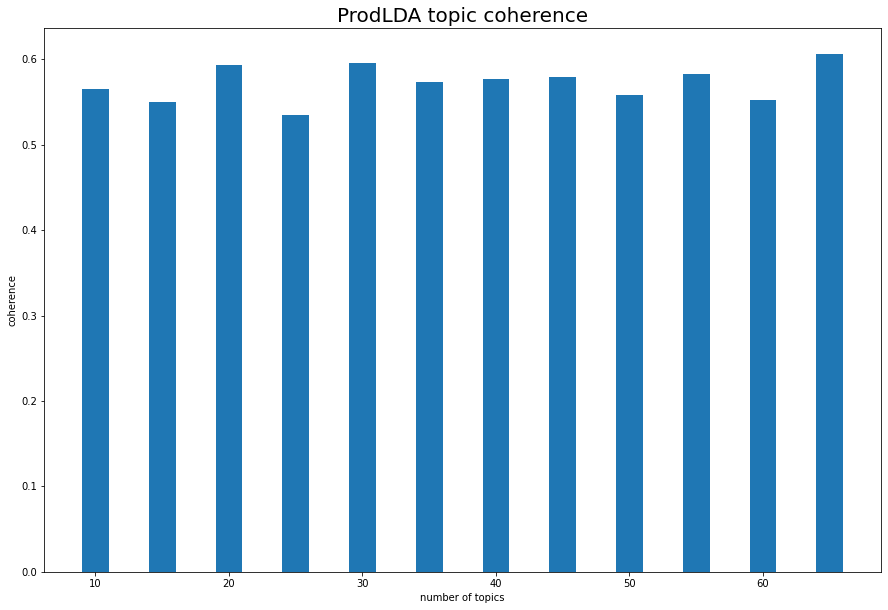

In [46]:
plt.figure(figsize=(15, 10))
plt.bar(prod_results["Topics"], prod_results["Coherence"], width=2)
plt.title("ProdLDA topic coherence", size=20)
plt.xlabel("number of topics")
plt.ylabel("coherence");

Next is a interesting visualization function. We should get an example model to run and get the topics from there. 

In [ ]:
def plot_word_cloud(b, ax, v, n):
    sorted_, indices = torch.sort(b, descending=True)
    df = pd.DataFrame(indices[:100].numpy(), columns=['index'])
    words = pd.merge(df, some_some_vocab[['index', 'word']],
                     how='left', on='index')['word'].values.tolist()
    sizes = (sorted_[:100] * 1000).int().numpy().tolist()
    freqs = {words[i]: sizes[i] for i in range(len(words))}
    wc = WordCloud(background_color="white", width=800, height=500)
    wc = wc.generate_from_frequencies(freqs)
    ax.set_title('Topic %d' % (n + 1))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")

if not smoke_test:
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    beta = prodLDA.beta()
    fig, axs = plt.subplots(7, 3, figsize=(14, 24))
    for n in range(beta.shape[0]):
        i, j = divmod(n, 3)
        plot_word_cloud(beta[n], axs[i, j], vocab, n)
    axs[-1, -1].axis('off');

    plt.show()

#FLSA-W

In [ ]:
!pip install FuzzyTM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 3.8 MB/s 
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20444 sha256=3245e21ee4524240b6bfca92dc2e2531101840e77fb063192a3355a47a696923
  Stored in directory: /root/.cache/pip/wheels/20/a2/8f/8482542dd6fabee54d33886a333838b1dacc9f3b2c6134b22a
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3529 sha256=c17772671d99901dc53e73c5ca766a467a76607ca8a96c8c04207f4ea3c16afb
  Stored in directory: /root/.cache/pip/wheels/9c/09/b0/2a992a59332064ba70954fde1281c50054465562314e523ac6
  Created wheel for sparsesvd: filename=sparsesvd-0.2.2-cp37-cp37m-linux_x86_64.whl size=297900 sha256=20aadcf9e049a149850afc827f519281fa0c4c39802a859519242ad15ad2c88e
  Stored in directory: /root/.cache/pip/wheels/4f/e5/2e/50014c1a0983cb8a0738d8c672ef890ef29262779c0259f1e3
Successfully built fst-pso miniful sparsesvd


In [ ]:
from FuzzyTM import FLSA_W

In [ ]:
data = [df["lemmas"][i] for i in range(len(df))]

In [ ]:
flsa_model_results = {'Topics': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
  pbar = tqdm.tqdm(total=540)

  # iterate through number of topics
  for k in topics_range:
    flsaW = FLSA_W(input_file = data, num_topics=k, num_words=10)
    pwgt, ptgd = flsaW.get_matrices()
    #pickle.dump(pwgt, open("/content/flsa/pwgt{}".format(k)), "wb")
    #pickle.dump(ptgd, open("/content/flsa/ptgd{}".format(k)), "wb")

    topics = flsaW.show_topics(representation='words')
    pd.DataFrame(topics).to_csv("flsa_topics{}".format(k))

    cv = flsaW.get_coherence_value(input_file = data, topics = topics)

    flsa_model_results['Topics'].append(k)
    flsa_model_results['Coherence'].append(cv)
                    
    pbar.update(10)
  pd.DataFrame(flsa_model_results).to_csv('flsa_tuning_results.csv', index=False)
  pbar.close()

 22%|██▏       | 120/540 [55:37<3:14:40, 27.81s/it]


In [ ]:
flsa_model_results

{'Coherence': [0.33130476152028987,
  0.3565497649233127,
  0.39644558387319867,
  0.37217745502799693,
  0.3764028811028419,
  0.3888679058307717,
  0.3894963859307527,
  0.3794693341659884,
  0.40891869503177275,
  0.41213432819171997,
  0.4095111422880907,
  0.40613650849698585],
 'Topics': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]}

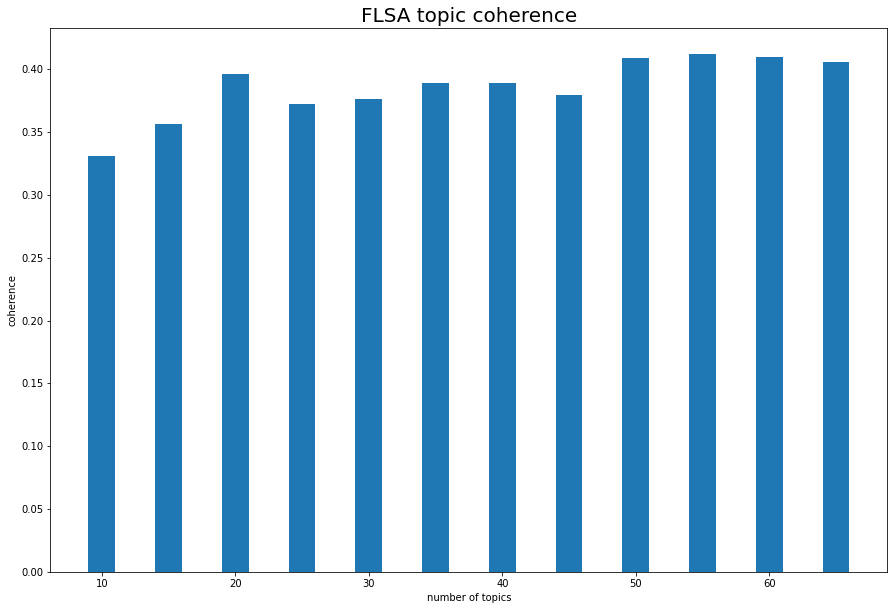

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(flsa_model_results["Topics"], flsa_model_results["Coherence"], width=2)
plt.title("FLSA topic coherence", size=20)
plt.xlabel("number of topics")
plt.ylabel("coherence");

In [ ]:
flsaW = FLSA_W(input_file = data, num_topics=5, num_words=10)
pwgt, ptgd = flsaW.get_matrices()

In [ ]:
flsaW.show_topics(representation="words")

[['also',
  'come',
  'related',
  'know',
  'way',
  'improve',
  'looking',
  'show',
  'liked',
  'feedback'],
 ['also',
  'stealing',
  'come',
  'related',
  'know',
  'way',
  'generalmust',
  'improve',
  'looking',
  'show'],
 ['advertisement',
  'kenya',
  'february',
  'summary',
  'author',
  'march',
  'million',
  'access',
  'check',
  'authority'],
 ['readnewswhats',
  'shm',
  'gerald',
  'kiplagat',
  'magistrate',
  'deceased',
  'resume',
  'recovered',
  'appealed',
  'yearthe'],
 ['hot',
  'saidthe',
  'urged',
  'issued',
  'ordered',
  'arrested',
  'category',
  'alert',
  'salaam',
  'bid']]